국가별 음주 데이터 분석하기

In [1]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = '../data/drinks.csv' # 불러올 파일을 상대 경로로 지정, ../는 부모 폴더
drinks = pd.read_csv(file_path)
print(drinks.info())
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [2]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


인사이트의 발견 : 탐색과 시각화하기

피처간의 상관관계 탐색

In [3]:
# 맥주와 와인 소비량의 상관 관계 알아보기
# beer_servings wine_servings 두 피처간의 상관계수를 계산합니다.
#피어슨 상관 계수 : 두 변수 X와 Y 간의 선형 상관 관계를 계량화한 수치
#corr()함수로 피처 간의 상관 계수를 매트릭스 형태로 출력할 수 있다
#corr = drinks[["beer_servings", "wine_servings"]].corr(method = "pearson")
corr = drinks.corr(method = "pearson")
corr

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


seaborn 시각화 라이브러리 활용

히트맵(heatmap), 페어플롯(pairplot) 기법 사용하기

히트맵 : 히트(heat)와 지도를 뜻하는 맵을 결합시킨 단어로 색상으로 표현할 수 있는 다양한 정보를 일정한 이미지 위에 열분포 형태의 그래픽으로 출력

In [4]:
!pip install seaborn

In [5]:
import seaborn as sns

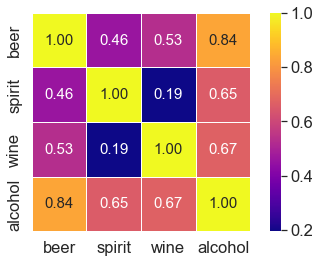

In [6]:
sns.set(font_scale = 1.5)
cols_view = ["beer", "spirit", "wine", "alcohol"]
#cbar 히트맵 바 출력 여부, annot 상관 계수 출력 여부, square 사각형의 형태, fmt 소수점 자리수,
#annot_kws 상관계수 폰트 크기, yticklabels y레이블명, xticklabels x레이블명
hm = sns.heatmap(corr.values, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols_view, xticklabels = cols_view, cmap="plasma", linewidths=.5)
plt.tight_layout()
plt.show()

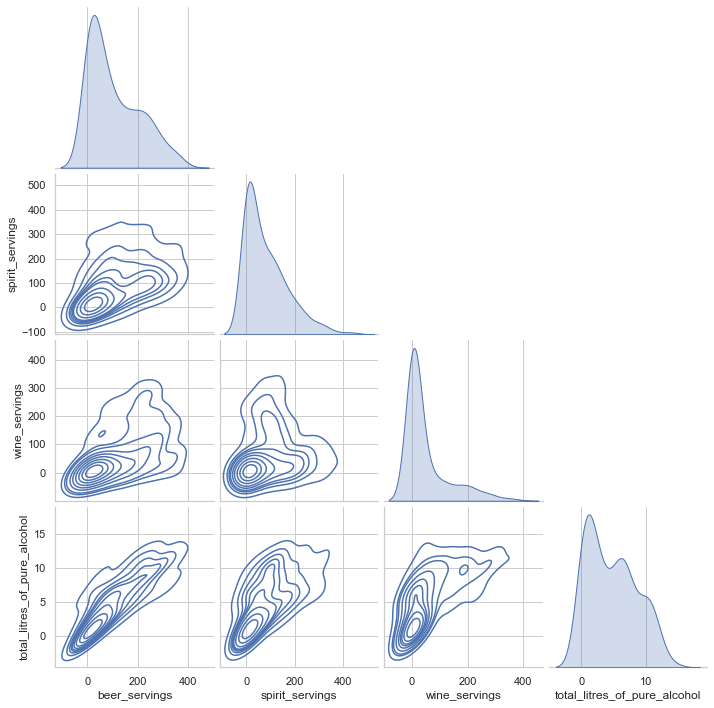

In [7]:
#시각화 라이브러리를 이용한 파처간의 scatter plot을 출력합니다.
sns.set(style = "whitegrid", context = "notebook")
sns.pairplot(drinks[["beer_servings", "spirit_servings", "wine_servings", "total_litres_of_pure_alcohol"]], height = 2.5, kind="kde", corner=True)
plt.show()

In [8]:
drinkgb = drinks.groupby("continent").mean()["wine_servings"] 
drinkgb

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [9]:
total_mean =drinks.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [10]:
continent_mean = drinks.groupby("continent").total_litres_of_pure_alcohol.mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [11]:
continent_mean_under = continent_mean[continent_mean <= total_mean]
continent_mean_under

continent
AF    3.007547
AS    2.170455
OC    3.381250
Name: total_litres_of_pure_alcohol, dtype: float64

In [12]:
continent_mean_under = continent_mean[continent_mean <= total_mean].index.tolist()
continent_mean_under

['AF', 'AS', 'OC']

In [13]:
continent_mean_under = continent_mean[continent_mean <= total_mean].values.tolist()
continent_mean_under

[3.0075471698113208, 2.1704545454545454, 3.38125]

In [14]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [15]:
#결측데이터 처리 : 기타 대륙으로 통합 -> "OT"(Others)
#fillna()함수는 피처의 결측값을 특정 값으로 채워주는 함수
drinks["continent"] = drinks["continent"].fillna("OT") 

In [16]:
print(drinks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB
None


In [17]:
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [18]:
drinks["continent"].value_counts()

AF    53
EU    45
AS    44
OT    23
OC    16
SA    12
Name: continent, dtype: int64

OT라는 대륙의 비율 파이차트로 확인

In [19]:
drinks["continent"].value_counts().index

Index(['AF', 'EU', 'AS', 'OT', 'OC', 'SA'], dtype='object')

In [20]:
labels = drinks["continent"].value_counts().index.tolist()
labels

['AF', 'EU', 'AS', 'OT', 'OC', 'SA']

In [21]:
values = drinks["continent"].value_counts().values.tolist()
values

[53, 45, 44, 23, 16, 12]

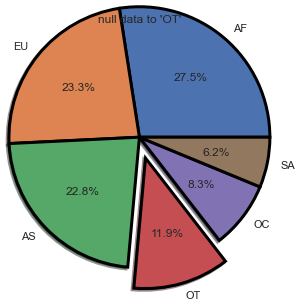

In [22]:
explode = (0, 0, 0, 0.25, 0, 0)
plt.pie(values, explode = explode, labels = labels, autopct = "%.1f%%", shadow = True, radius = 1.5, wedgeprops = {'linewidth': 3, "edgecolor":"black"})
plt.title("null data to \'OT\'")
plt.show()

apply, agg 함수를 이용한 대륙별 분석

대륙별 spirit_servings의 평균, 최소, 최대, 합계를 계산

In [23]:
drinks.groupby("continent").describe()["spirit_servings"] 

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.339623,28.102794,0.0,1.00,3.0,19.00,152.0
AS,44.0,60.840909,84.362160,0.0,1.00,16.0,98.00,326.0
EU,45.0,132.555556,77.589115,0.0,81.00,122.0,173.00,373.0
OC,16.0,58.437500,70.504817,0.0,18.00,37.0,65.25,254.0
OT,23.0,165.739130,94.993884,68.0,101.00,137.0,190.50,438.0
SA,12.0,114.750000,77.077440,25.0,65.75,108.5,148.75,302.0


In [24]:
# agg() 함수는 apply() 함수와 거의 동일하게 함수 파라미터를 받음
# agg() 함수는 함수 파라미터를 병렬로 설정하여 그룹에 대한 여러가지 연산 결과를 동시에 얻을 수 있는 함수
drinks.groupby("continent")["spirit_servings"] .agg(["mean", "min", "max", "sum"])

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


전체 평균보다 많은 알코올을 섭취하는 대륙

In [25]:
#전체 알코올 섭취 평균
total_mean =drinks.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [26]:
#대륙별 알코올 섭취 평균
continent_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [27]:
#전체 평균보다 많은 알코올을 섭취하는 대륙
continent_max = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
continent_max[continent_max  > total_mean]

continent
EU    8.617778
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

평균 beer_servings 이 가장 높은 대륙
- inxmin, idxmax 는 전체 인덱스 중 최소값, 최대값 반환

In [28]:
#3-1 대륙별 평균 beer_servings 계산
#3-2 결과 중 값이 가장 높은 인덱스만 추출
drinks.groupby("continent")["beer_servings"].mean().idxmax()

'EU'

In [29]:
#평균 beer_servings 이 가장 낮은 대륙
drinks.groupby("continent")["beer_servings"].mean().idxmin()

'AS'

대륙별 spirit_servings 평균, 최소, 최대, 합계를 시각화

In [30]:
result = drinks.groupby("continent")["spirit_servings"] .agg(["mean", "min", "max", "sum"])
result

,mean,min,max,sum
continent,,,,
AF,16.339623,0,152,866
AS,60.840909,0,326,2677
EU,132.555556,0,373,5965
OC,58.437500,0,254,935
OT,165.739130,68,438,3812
SA,114.750000,25,302,1377


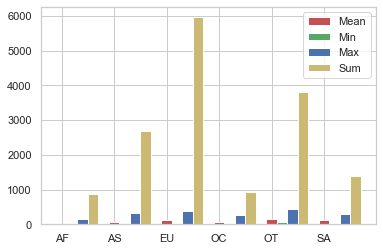

In [31]:
n_groups = len(result.index)
means = result["mean"].tolist()
mins = result["min"].tolist()
maxs = result["max"].tolist()
sums = result["sum"].tolist()

index = np.arange(n_groups) # n_groups의 크기 6만큼 배열 생성하여 index에  저장
bar_width = 0.2

rects1 = plt.bar(index, means, bar_width, color="r", label="Mean")
rects2 = plt.bar(index + bar_width, mins, bar_width, color="g", label="Min")
rects3 = plt.bar(index + bar_width*2, maxs, bar_width, color="b", label="Max")
rects4 = plt.bar(index + bar_width*3, sums, bar_width, color="y", label="Sum")

plt.xticks(index, result.index.tolist())
plt.legend() # 그래프에 범례를 달고 싶을 때 쓰는 함수
plt.show()

In [32]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [33]:
drinks.to_csv('drinks_bigdata.csv')

In [34]:
drinks.to_csv('../data/drinks_bigdata.csv')

In [35]:
import os

In [36]:
plt.rc("font", family="Malgun Gothic")

In [37]:
%config InlineBackend.figure_format = 'retina'

In [38]:
plt.rcParams["figure.figsize"] = (6, 5)  # (x, y) 그래프 크기 설정

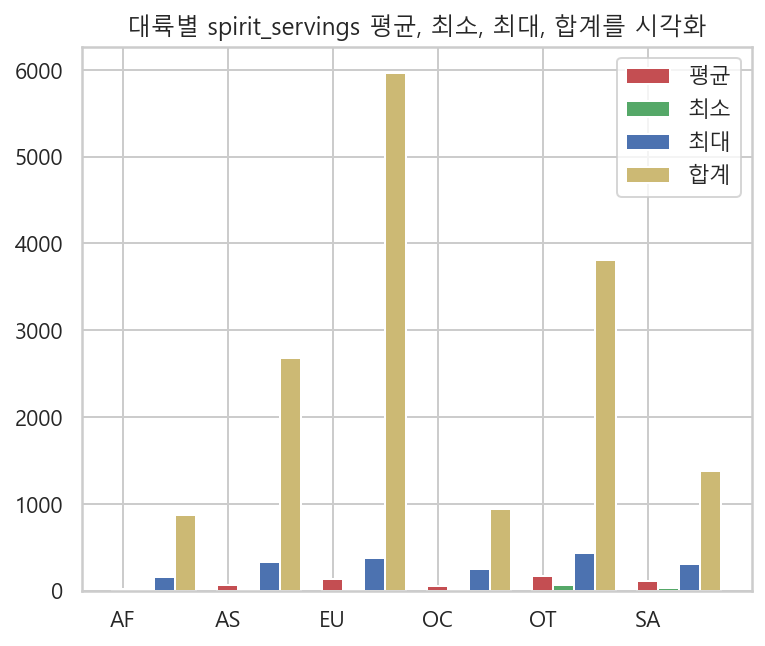

In [39]:
n_groups = len(result.index)
means = result["mean"].tolist()
mins = result["min"].tolist()
maxs = result["max"].tolist()
sums = result["sum"].tolist()

index = np.arange(n_groups) # n_groups의 크기 6만큼 배열 생성하여 index에  저장
bar_width = 0.2

rects1 = plt.bar(index, means, bar_width, color="r", label="평균")
rects2 = plt.bar(index + bar_width, mins, bar_width, color="g", label="최소")
rects3 = plt.bar(index + bar_width*2, maxs, bar_width, color="b", label="최대")
rects4 = plt.bar(index + bar_width*3, sums, bar_width, color="y", label="합계")

plt.title("대륙별 spirit_servings 평균, 최소, 최대, 합계를 시각화")
plt.xticks(index, result.index.tolist())
plt.legend() # 그래프에 범례를 달고 싶을 때 쓰는 함수
plt.show()

대륙별 beer_servings를 시각화

In [40]:
#대륙별 total_litres_of_pure_alcohol의 평균
continent_mean = drinks.groupby("continent")["total_litres_of_pure_alcohol"].mean()
continent_mean

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
OT    5.995652
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

In [41]:
continent_mean.index

Index(['AF', 'AS', 'EU', 'OC', 'OT', 'SA'], dtype='object', name='continent')

In [42]:
continent_mean.values

array([3.00754717, 2.17045455, 8.61777778, 3.38125   , 5.99565217,
       6.30833333])

In [43]:
continents = continent_mean.index.tolist()

In [44]:
continents.append('mean')
continents

['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'mean']

In [45]:
total_mean =drinks.total_litres_of_pure_alcohol.mean()
total_mean

4.717098445595855

In [46]:
alcohol = continent_mean.values.tolist()
alcohol

[3.0075471698113208,
 2.1704545454545454,
 8.617777777777778,
 3.38125,
 5.995652173913044,
 6.308333333333334]

In [47]:
alcohol.append(total_mean)
alcohol

[3.0075471698113208,
 2.1704545454545454,
 8.617777777777778,
 3.38125,
 5.995652173913044,
 6.308333333333334,
 4.717098445595855]

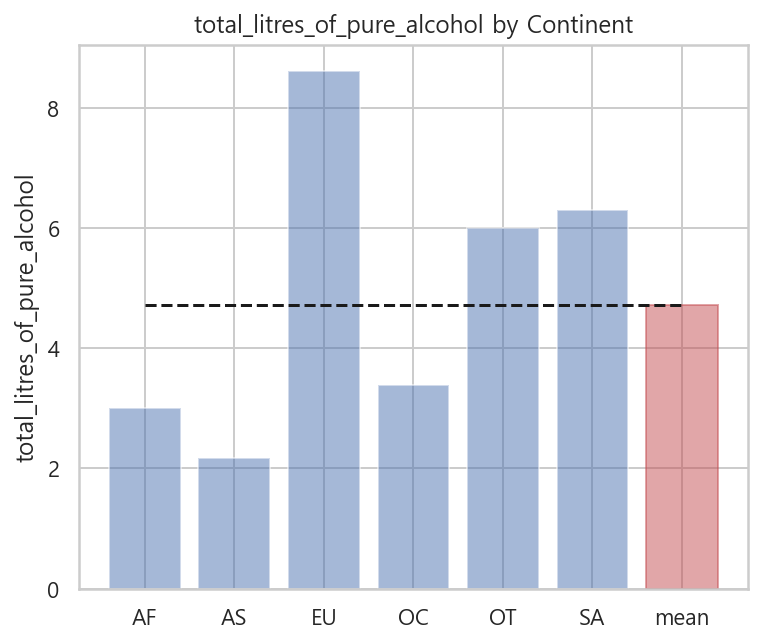

In [48]:
x_pos = np.arange(len(continents))
bar_list = plt.bar(x_pos, alcohol, align='center', alpha=0.5) #alpha -> 투명도
bar_list[len(continents)-1].set_color('r') 

plt.plot([0, 6], [total_mean, total_mean], "k--") #평균 수치에 선 생성
plt.xticks(x_pos, continents)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')
plt.show()

In [49]:
total_std =drinks.total_litres_of_pure_alcohol.std()
total_std

3.773298164356083

In [50]:
continent_std = drinks.groupby("continent")["total_litres_of_pure_alcohol"].std()
continent_std

continent
AF    2.647557
AS    2.770239
EU    3.358455
OC    3.345688
OT    2.409353
SA    1.531166
Name: total_litres_of_pure_alcohol, dtype: float64

In [51]:
continents_std2 = continent_std.index.tolist()
continents_std2

['AF', 'AS', 'EU', 'OC', 'OT', 'SA']

In [52]:
continents_std2.append('Total 표준편차')
continents_std2

['AF', 'AS', 'EU', 'OC', 'OT', 'SA', 'Total 표준편차']

In [53]:
alcohol_std = continent_std.values.tolist()
alcohol_std

[2.647556860477786,
 2.7702388063842913,
 3.3584553327716336,
 3.345687522767182,
 2.4093526593577264,
 1.5311661232438816]

In [54]:
alcohol_std.append(total_std)
alcohol_std

[2.647556860477786,
 2.7702388063842913,
 3.3584553327716336,
 3.345687522767182,
 2.4093526593577264,
 1.5311661232438816,
 3.773298164356083]

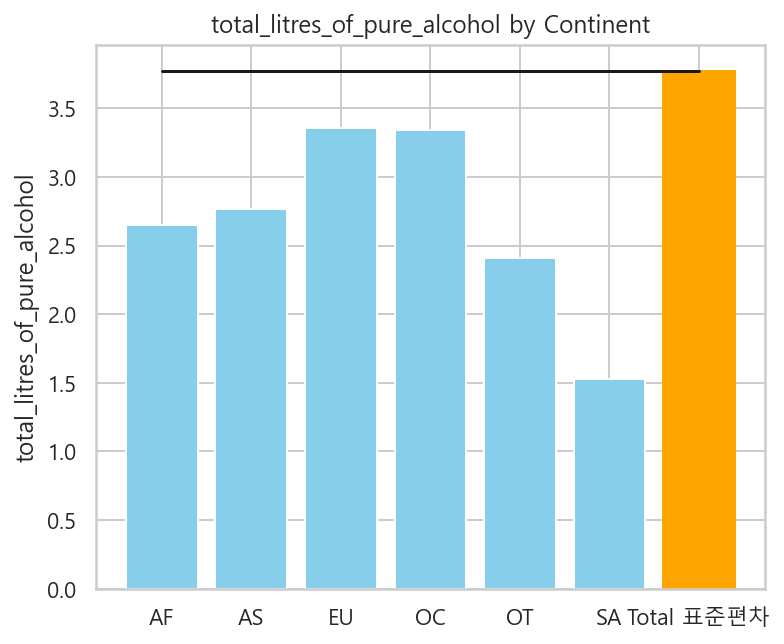

In [55]:
x_pos = np.arange(len(continents_std2))
bar_list = plt.bar(x_pos, alcohol_std, align='center', alpha=1, color='skyblue') #alpha -> 투명도
bar_list[len(continents_std2)-1].set_color('orange') 

plt.plot([0, 6], [total_std, total_std], "k-") #평균 수치에 선 생성
plt.xticks(x_pos, continents_std2)

plt.ylabel('total_litres_of_pure_alcohol')
plt.title('total_litres_of_pure_alcohol by Continent')
plt.show()

분석 대상간의 통계적 차이 검정하기

아프리카와 유럽간의 맥주 소비량 차이 검정하기

In [56]:
#loc() 는 인덱스를 기준으로 행테이터 추춯
#continent 피처의 값이 AF인 것의 행 데이터 추출
africa = drinks.loc[drinks['continent']=='AF']
#continent 피처의 값이 EU인 것의 행 데이터 추출
europe = drinks.loc[drinks['continent']=='EU']

In [57]:
from scipy import stats

In [58]:
#등분산을 가정한 케이스
tTestResult = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'])
#등분산을 가정하지 않은 케이스
ttestResultDiffVar = stats.ttest_ind(africa['beer_servings'], europe['beer_servings'], equal_var=False)

print("The t-statistic and p-value assuming equal variances is %.3f and %.3f." % tTestResult)
print("The t-statistic and p-value not assuming equal variances is %.3f and %.3f." % ttestResultDiffVar)

The t-statistic and p-value assuming equal variances is -7.268 and 0.000.
The t-statistic and p-value not assuming equal variances is -7.144 and 0.000.


대한민국은 얼마나 술을 독하게 마시는 나라일까?

In [59]:
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [60]:
# 전체 술 소비량 피처 생성
drinks['total_servings'] = drinks['beer_servings'] + drinks['spirit_servings'] + drinks['wine_servings']
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [61]:
# 전체 술 소비량 대비 알콜 비율 피처를 생성
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,NaN
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [62]:
#null에 0으로 채움
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna(0)
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
1,Albania,89,132,54,4.9,EU,275,0.017818
2,Algeria,25,0,14,0.7,AF,39,0.017949
3,Andorra,245,138,312,12.4,EU,695,0.017842
4,Angola,217,57,45,5.9,AF,319,0.018495
...,...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,436,0.017661
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [63]:
country_with_rank = drinks[['country', 'alcohol_rate']]
country_with_rank = country_with_rank.sort_values(by=['alcohol_rate'], ascending =0)
country_with_rank

,country,alcohol_rate
63,Gambia,0.266667
153,Sierra Leone,0.223333
124,Nigeria,0.185714
179,Uganda,0.153704
142,Rwanda,0.151111
...,...,...
103,Maldives,0.000000
97,Libya,0.000000
79,Iran,0.000000
90,Kuwait,0.000000


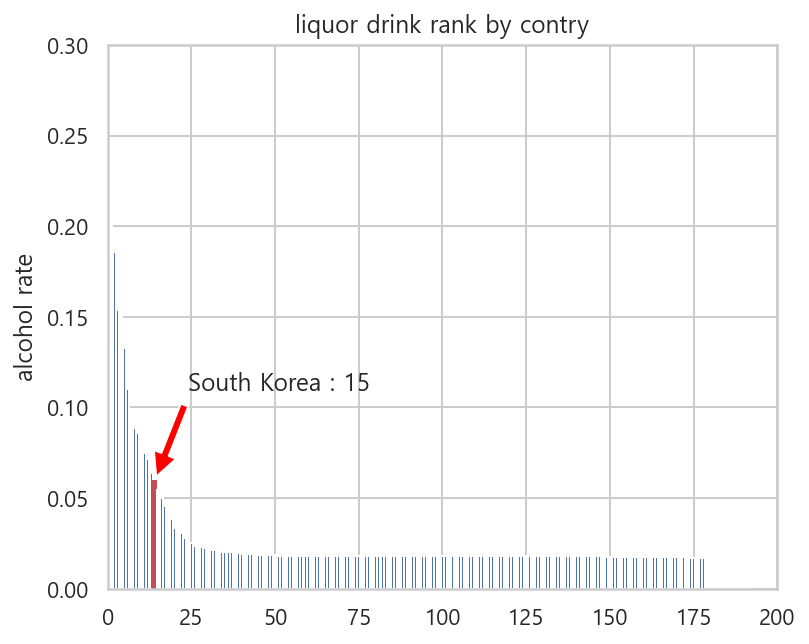

In [64]:
#국가별 순위 정보 시각화
country_list = country_with_rank.country.tolist()
x_pos = np.arange(len(country_list))
rank = country_with_rank.alcohol_rate.tolist()

bar_list = plt.bar(x_pos, rank)
bar_list[country_list.index("South Korea")].set_color('r')
plt.ylabel('alcohol rate')
plt.title('liquor drink rank by contry')
plt.axis([0, 200, 0, 0.3]) #x, y축에 대한 옵션을 다루는 메소드, x축 0~200, y축 0~3까지 값 출력

korea_rank = country_list.index("South Korea")
korea_alc_rate = country_with_rank[country_with_rank['country'] == 'South Korea']['alcohol_rate'].values[0]
#시리즈에서 값을 추출하면 시리즈가 되기떄문에 값 하나만 추출 values[0]
plt.annotate('South Korea : ' + str(korea_rank + 1), #텍스트 값
             xy = (korea_rank, korea_alc_rate),      #화살표 머리 표시할 x,y 위치
             xytext = (korea_rank + 10, korea_alc_rate + 0.05),  #화살표 텍스트를 표시할 x,y 위치
             arrowprops = dict(facecolor = 'red', shrink=0.05)) #화살표 색상

plt.show()


In [69]:
continent_group = drinks.groupby('continent').mean()['wine_servings']
continent_group

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
SA     62.416667
Name: wine_servings, dtype: float64

In [84]:
country_beer_servings = drinks.groupby('country').sum()['beer_servings']
country_spirit_servings = drinks.groupby('country').sum()['spirit_servings']
country_wine_servings = drinks.groupby('country').sum()['wine_servings']
country_total_servings = country_beer_servings + country_spirit_servings + country_wine_servings
country_total_servings

country
Afghanistan      0
Albania        275
Algeria         39
Andorra        695
Angola         319
              ... 
Venezuela      436
Vietnam        114
Yemen            6
Zambia          55
Zimbabwe        86
Length: 193, dtype: int64

In [112]:
continent_mean_under = continent_mean[continent_mean <= total_mean]
continent_mean_under = continent_mean_under.index.tolist()
continent_mean_under

['AF', 'AS', 'OC']

In [113]:
df_continent_mean_under = drinks.loc[drinks.continent.isin(continent_mean_under)]
df_continent_mean_under

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings,alcohol_rate
0,Afghanistan,0,0,0,0.0,AS,0,0.000000
2,Algeria,25,0,14,0.7,AF,39,0.017949
4,Angola,217,57,45,5.9,AF,319,0.018495
8,Australia,261,72,212,10.4,OC,545,0.019083
12,Bahrain,42,63,7,2.0,AS,112,0.017857
...,...,...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC,50,0.018000
189,Vietnam,111,2,1,2.0,AS,114,0.017544
190,Yemen,6,0,0,0.1,AS,6,0.016667
191,Zambia,32,19,4,2.5,AF,55,0.045455


In [114]:
most_spirit_nuder_mean = df_continent_mean_under.loc[df_continent_mean_under['spirit_servings'].idxmax()]
most_spirit_nuder_mean

country                         Russian Federation
beer_servings                                  247
spirit_servings                                326
wine_servings                                   73
total_litres_of_pure_alcohol                  11.5
continent                                       AS
total_servings                                 646
alcohol_rate                              0.017802
Name: 141, dtype: object

In [115]:
most_spirit_nuder_mean['country']

'Russian Federation'